# Iris Exploratory Data Analysis
Running computations, analyzing data, and answering questions about the Fisher Iris dataset.

In [264]:
import math
import sys

In [265]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

In [ ]:
# Import data
iris = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/iris/iris.tsv.gz", sep='\t')
iris.sample(10)

,sepal-length,sepal-width,petal-length,petal-width,target
55,5.4,3.4,1.5,0.4,0
103,5.4,3.7,1.5,0.2,0
143,6.1,2.9,4.7,1.4,1
46,6.7,3.3,5.7,2.5,2
86,5.4,3.4,1.7,0.2,0
81,6.6,3.0,4.4,1.4,1
93,6.4,2.8,5.6,2.2,2
108,6.1,3.0,4.9,1.8,2
37,5.7,2.8,4.1,1.3,1
90,6.5,3.2,5.1,2.0,2


### Dataset Description

In [ ]:
iris.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'target'], dtype='object')

The dataset samples different flowers.

'sepal-length' is continuous and describes the length of the flower's sepal.

'sepal-width' is continuous and describes the width of the flower's sepal.

'petal-length' is continuous and describes the length of the flower's petal.

'petal-width' is continuous and describes the width of the flower's petal.

'target' is the categorical target column and labels the flower (0-2) as an Iris Setosa, Iris Versicolour, or Iris Virginica.

### Plotting Histograms of Each Column

array([[<Axes: title={'center': 'sepal-length'}>,
        <Axes: title={'center': 'sepal-width'}>],
       [<Axes: title={'center': 'petal-length'}>,
        <Axes: title={'center': 'petal-width'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

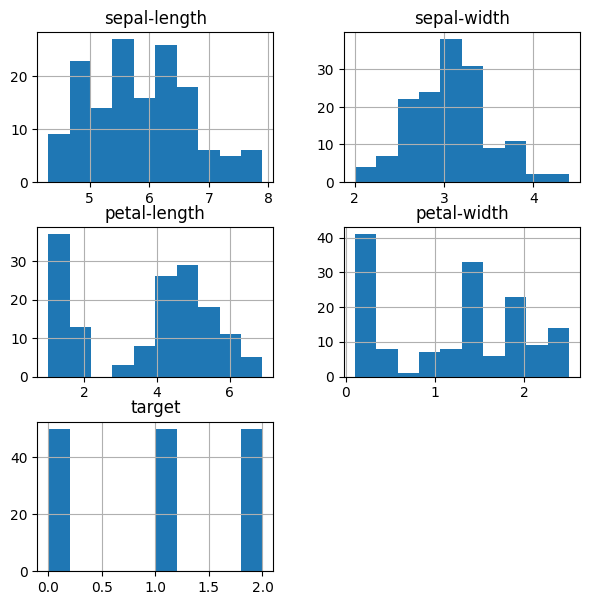

In [ ]:
iris.hist(figsize=(7,7))

'sepal-length' best matches a normal distribution. 'sepal-width' best matches a normal distribution. 'petal-length' best matches a bimodal distribution. 'petal-width' best matches a right-skewed distribution. 'target' best matches a uniform distribution.

### Examining Column Independence

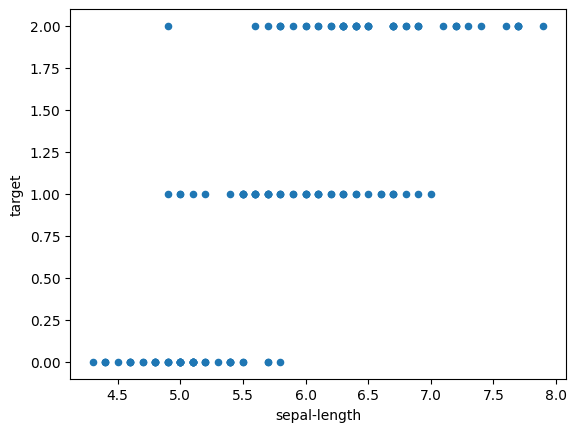

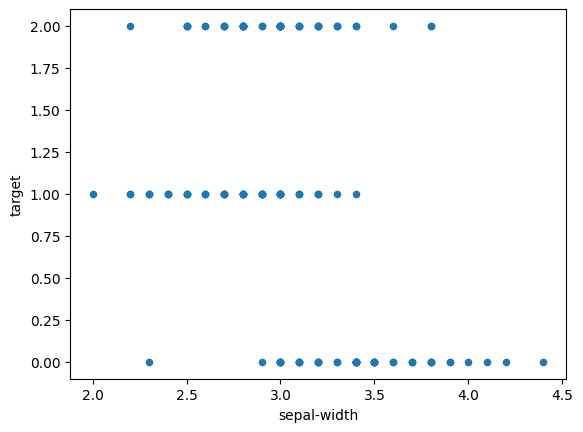

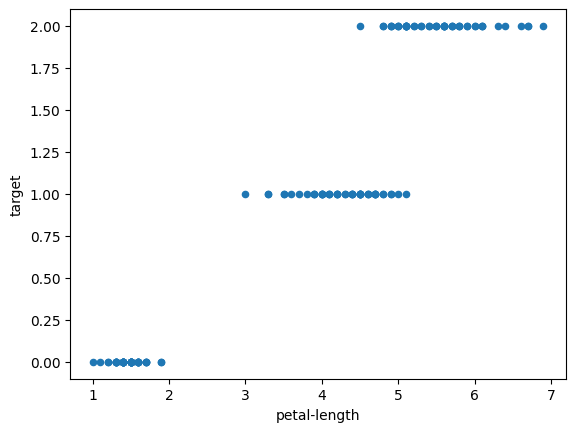

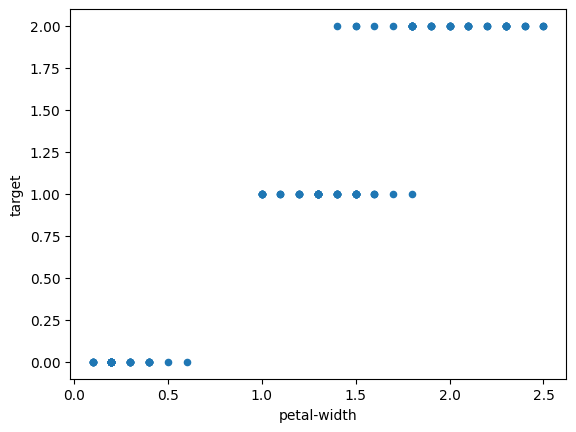

In [ ]:
# 
cols = iris.columns.drop('target')
for col in cols:
    iris.plot(x=col, y='target', kind='scatter')

The ('sepal-length', 'target'), ('petal-length', 'target') and ('petal-width', 'target') pairs are not independent because there is a positive relationship between the variables that you can see in the mean and median, although it is more pronounced in the last two pairs, and the points for each value of the target variable are fairly close together. The ('sepal-width', 'target') pair is independent because there is no clear relationship between the variables and the points are spread out.

### Ordinary Least Squares Regression 

Mean Squared Error: 0.046385088311226945


Text(0, 0.5, 'Predicted Outputs')

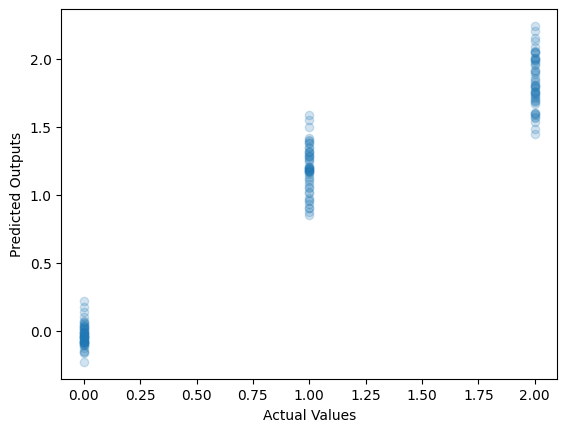

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

inputs = iris[cols]
target = iris.target
model = LinearRegression()
model.fit(inputs, target)

predictions = model.predict(inputs)
mse = mean_squared_error(target, predictions)
print(f'Mean Squared Error: {mse}')

plt.scatter(target, predictions, alpha=0.2)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')


### Comparing Models Using One Column vs. All Columns


In [ ]:
newmodel = LinearRegression()
for i, col in enumerate(cols):
    newmodel.fit(inputs[[col]], target)
    predictions = newmodel.predict(inputs[[col]])
    newmse = mean_squared_error(target, predictions)
    print(f'Mean Squared Error for {col}: {newmse}')
print(f'Problem 5 MSE: {mse}')

Mean Squared Error for sepal-length: 0.2583986123119253
Mean Squared Error for sepal-width: 0.5493765900582832
Mean Squared Error for petal-length: 0.06621216537347084
Mean Squared Error for petal-width: 0.05678463583919234
Problem 5 MSE: 0.046385088311226945


The column 'petal-width' gives the best linear model of the target on its own. It has a slightly worse MSE compared to the model in problem 5.

### Picking and Plotting Input Columns with Visible Dependency

Text(0.5, 0, 'petal_width')

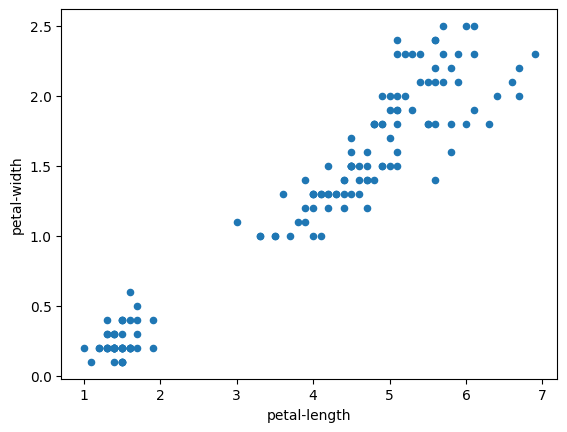

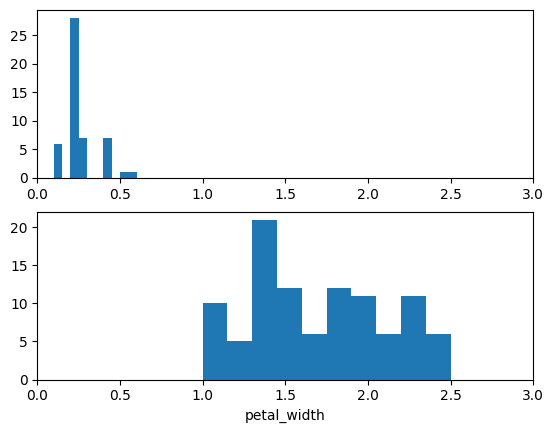

In [ ]:
iris.plot(x='petal-length', y='petal-width', kind='scatter')
fig, axs = plt.subplots(2)
axs[0].hist(iris.query('`petal-length` < 3')['petal-width'])
axs[0].set_xlim(0, 3)
axs[1].hist(iris.query('`petal-length` >= 3')['petal-width'])
axs[1].set_xlim(0, 3)
axs[1].set_xlabel('petal_width')


### Principal Components Analysis of Input Columns

Principal components:


,sepal-length,sepal-width,petal-length,petal-width
0,0.361590,-0.082269,0.856572,0.358844
1,0.656540,0.729712,-0.175767,-0.074706
2,-0.580997,0.596418,0.072524,0.549061
3,0.317255,-0.324094,-0.479719,0.751121


Ratio of data variation explained by the first half of the principal components:  [0.92461621 0.05301557]
For comparison: PCA MSE from first half of principal components: 0.06071253628629803. Previous model MSE: 0.046385088311226945.


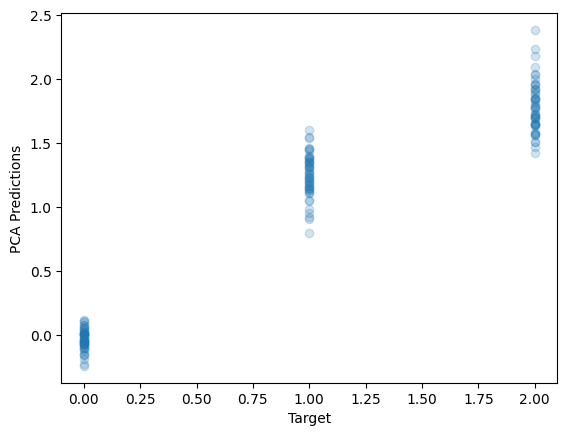

In [ ]:
pca = PCA()
pca.fit(inputs)
iris_components = pd.DataFrame(pca.components_, columns = inputs.columns)
print('Principal components:')
display(iris_components)

explained_variance = pca.explained_variance_ratio_
print(f'Ratio of data variation explained by the first half of the principal components:  {explained_variance[:int(len(explained_variance) / 2 )]}')

reg = LinearRegression()
coordinates = inputs @ iris_components.head(len(iris_components) // 2).T
reg.fit(coordinates, target)

pca_predictions = reg.predict(coordinates)
pca_mse = mean_squared_error(target, pca_predictions)

print(f'For comparison: PCA MSE from first half of principal components: {pca_mse}. Previous model MSE: {mse}.')

plt.scatter(target, pca_predictions, alpha=0.2)
plt.xlabel('Target')
plt.ylabel('PCA Predictions')
None

### Examining Column Correlation

In [ ]:
inputs.corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


Petal length and petal width have the highest correlation. In the first principal component, petal length has the highest explained variance at 85% and petal width and sepal length are both around 35%. In the second principal component, petal length and petal width both have very low explained variance, unlike both sepal length and sepal width.

### Identifying Outlier Row

,sepal-length,sepal-width,petal-length,petal-width,target
83,-1.021849,-2.438987,-0.147093,-0.261193,0.000000
1,0.189830,-1.976181,0.705893,0.396172,1.224745
69,0.189830,-1.976181,0.137236,-0.261193,0.000000
98,0.432165,-1.976181,0.421564,0.396172,0.000000
95,0.553333,-1.744778,0.364699,0.133226,0.000000
99,-1.021849,-1.744778,-0.260824,-0.261193,0.000000
113,-0.416010,-1.744778,0.137236,0.133226,0.000000
57,-1.627688,-1.744778,-1.398138,-1.181504,-1.224745
126,-1.143017,-1.513375,-0.260824,-0.261193,0.000000
5,-0.416010,-1.513375,0.023504,-0.129720,0.000000


sepal-length    4.5
sepal-width     2.3
petal-length    1.3
petal-width     0.3
target          0.0
Name: 57, dtype: float64

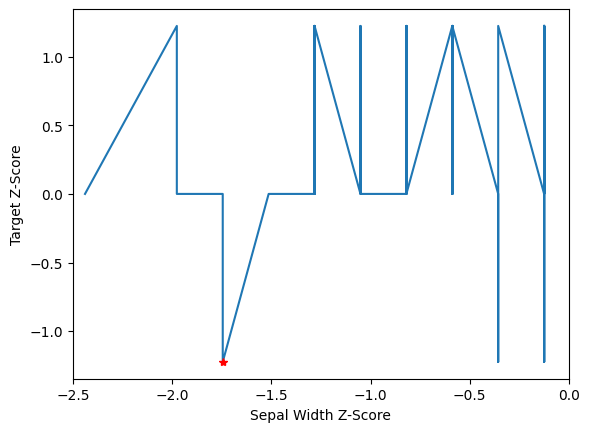

In [ ]:
from scipy.stats import zscore

data = zscore(iris).sort_values(by='sepal-width').head(75)
display(data.head(20))
display(iris.iloc[57])
plt.plot(data['sepal-width'], data['target'])
plt.xlabel('Sepal Width Z-Score')
plt.ylabel('Target Z-Score')
plt.xlim(-2.5, 0)
plt.plot(-1.744778, -1.224745, 'r*')

I identified row 57 as an outlier using the Z-score of sepal width and the target. The value at this row for sepal width is 1.74 standard deviations on the negative side of the mean, and the target is 1.22 standard deviations on the negative side of the mean, which stands out from all other negative Z-scores for sepal width.